In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.regularizers import l2
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

i. Load a small dataset of any application of your choice.

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

ii. Split the dataset with 80% training and 20% testing sets

In [5]:
train_images, val_images = train_images[:48000], train_images[48000:]
train_labels, val_labels = train_labels[:48000], train_labels[48000:]


iii. Visualize some samples from the dataset with their corresponding labels.

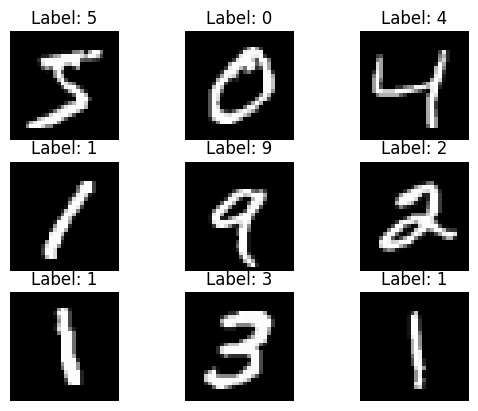

In [6]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f'Label: {train_labels[i]}')
    plt.axis('off')
plt.show()


iv. Implement the LeNet neural network architecture by initializing the weights and biases.

In [7]:
def create_lenet():
    model = models.Sequential()
    model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.AveragePooling2D(pool_size=3))
    model.add(layers.Conv2D(16, (5, 5), activation='relu'))
    model.add(layers.AveragePooling2D(pool_size=3))
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(84, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

model = create_lenet()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


v. Use a cross-entropy loss function suitable for classification tasks.

vi. Select an optimizer like SGD or Adam to train the model.

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


vii. Train the model on the training set.

In [9]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(val_images, val_labels))


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.7841 - loss: 0.7864 - val_accuracy: 0.9597 - val_loss: 0.1348
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9602 - loss: 0.1273 - val_accuracy: 0.9729 - val_loss: 0.0922
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.9708 - loss: 0.0938 - val_accuracy: 0.9722 - val_loss: 0.0889
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9730 - loss: 0.0861 - val_accuracy: 0.9732 - val_loss: 0.0883
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9774 - loss: 0.0742 - val_accuracy: 0.9719 - val_loss: 0.0905
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9809 - loss: 0.0629 - val_accuracy: 0.9794 - val_loss: 0.0699
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.9797 - loss: 0.0604 - val_accuracy: 0.9830 - val_loss: 0.0624
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9827 -

viii. Monitor the training loss and accuracy after each epoch:

The training and validation loss and accuracy are monitored during training and stored in the history object.

ix. Evaluate the model on the test set.

x. Report the accuracy and loss on the test data.

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9766 - loss: 0.0767
Test accuracy: 0.9817000031471252, Test loss: 0.061294395476579666


2. Experiment with Learning Rates, Batch Sizes, and Number of Neurons

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.fit(train_images, train_labels, epochs=10, batch_size=64)
model.add(Dense(128, activation='relu'))


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.9895 - loss: 0.0339
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.9910 - loss: 0.0289
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.9914 - loss: 0.0271
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.9907 - loss: 0.0291
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9907 - loss: 0.0297
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.9915 - loss: 0.0277
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.9925 - loss: 0.0236
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9928 - loss: 0.0234
Epoch 9/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9924 - loss: 0.0231
Epoch 10/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9928 - loss: 0.0217


3. Implement Regularization Techniques

In [ ]:
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))

4. Plot Training and Validation Accuracy/Loss

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9861 - loss: 0.0441 - val_accuracy: 0.9815 - val_loss: 0.0687
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9884 - loss: 0.0342 - val_accuracy: 0.9829 - val_loss: 0.0613
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 13ms/step - accuracy: 0.9909 - loss: 0.0277 - val_accuracy: 0.9835 - val_loss: 0.0631
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9906 - loss: 0.0290 - val_accuracy: 0.9871 - val_loss: 0.0577
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9903 - loss: 0.0289 - val_accuracy: 0.9842 - val_loss: 0.0621
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.9923 - loss: 0.0265 - val_accuracy: 0.9849 - val_loss: 0.0622
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9908 - loss: 0.0278 - val_accuracy: 0.9856 - val_loss: 0.0597
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9913 -

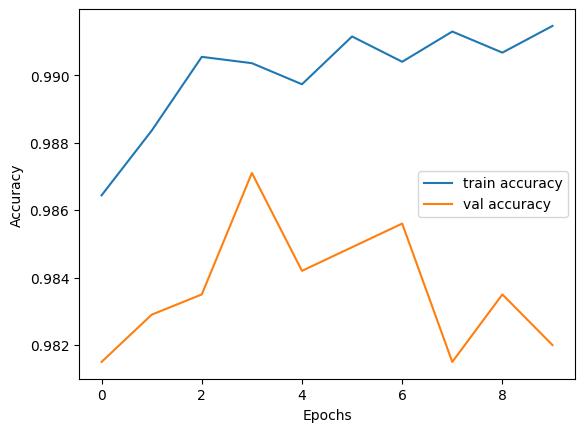

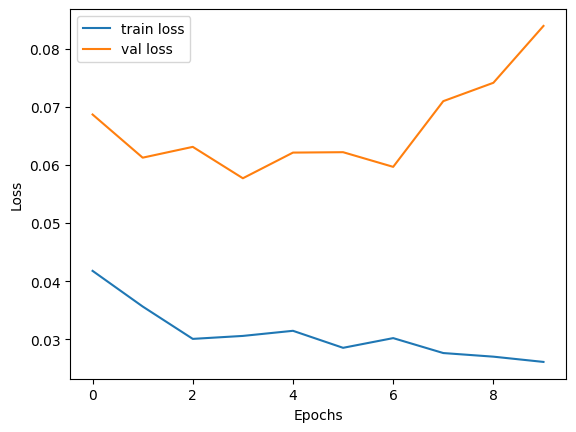

In [ ]:
import matplotlib.pyplot as plt
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10)

# Plot accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


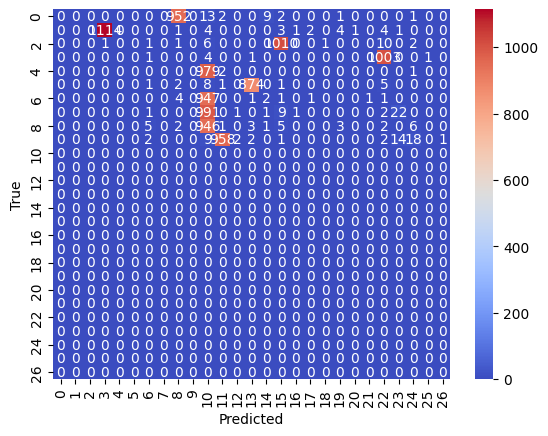

In [ ]:
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(test_labels, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()